In [96]:
import numpy as np
import sympy as sm

## Eigenvectors and Eigenvalues
### Use numpy only
#### Find eigenvalues and eigenvevtors of the following:

$$\begin{bmatrix} 1&0 \\ 0&2 \end{bmatrix}$$
$$\begin{bmatrix} 1&2 \\ 3&-4 \end{bmatrix}$$

In [97]:
T1 = np.array([[1, 0],
               [0, 2]])


eig_values, eig_vectors = np.linalg.eig(T1)

print('Eign Values: \n', eig_values)
print('Eign Vectors: \n', eig_vectors)

Eign Values: 
 [1. 2.]
Eign Vectors: 
 [[1. 0.]
 [0. 1.]]


In [98]:
T2 = np.array([[1, 2],
               [3, -4]])

eig_values, eig_vectors = np.linalg.eig(T2)

print('Eign Values: \n', eig_values)
print('Eign Vectors: \n', eig_vectors)

Eign Values: 
 [ 2. -5.]
Eign Vectors: 
 [[ 0.89442719 -0.31622777]
 [ 0.4472136   0.9486833 ]]


## Diagonalization
- Use eigen decomposition of the second matrix from the above transformation matrices and apply it 10 times to a vector (-1,1).
- Make sure the same result will be obtained if we apply the original matrix 10 time. use <b>np.linalg.matrix_power()</b>

In [99]:
T = np.array([[1, 2],
               [3, -4]])

V = np.array([[-1],
               [1]])                

eig_values, eig_vectors = np.linalg.eig(T)

print('Eign Values: \n', eig_values)
print('Eign Vectors: \n', eig_vectors)

Eign Values: 
 [ 2. -5.]
Eign Vectors: 
 [[ 0.89442719 -0.31622777]
 [ 0.4472136   0.9486833 ]]


In [100]:
D = np.diag(eig_values)

print('B Diagonal Matrix\n', D)

B Diagonal Matrix
 [[ 2.  0.]
 [ 0. -5.]]


In [101]:
diagonalization_result = eig_vectors @ D**10 @ np.linalg.inv(eig_vectors) @ V

print('Using Diagonalization:\n', diagonalization_result)

Using Diagonalization:
 [[-4185853.]
 [12555511.]]


In [102]:
matrix_power_result = np.linalg.matrix_power(T, 10) @ V

print('Using power function:\n', matrix_power_result)

Using power function:
 [[-4185853]
 [12555511]]


# PCA Using Eigen Decomposition

### Create a matrix contains the following data

In [103]:
X = np.array([[1, 2, 3, 4],
                 [5, 5, 6, 7],
                 [1, 4, 2, 3],
                 [5, 3, 2, 1],
                 [8, 1, 2, 2]])

X

array([[1, 2, 3, 4],
       [5, 5, 6, 7],
       [1, 4, 2, 3],
       [5, 3, 2, 1],
       [8, 1, 2, 2]])

### Step 1: Standardize the dataset (Subtract mean and divide by standard deviation).

In [104]:
X_mean = X.mean(0)
X_std = X.std(0)

print('mean:', X.mean(0))
print('std:', X.std(0))

mean: [4.  3.  3.  3.4]
std: [2.68328157 1.41421356 1.54919334 2.05912603]


In [105]:
X_standard = (X - X_mean) / X_std

print('Standardized data:\n', X_standard)

Standardized data:
 [[-1.11803399 -0.70710678  0.          0.29138576]
 [ 0.372678    1.41421356  1.93649167  1.74831455]
 [-1.11803399  0.70710678 -0.64549722 -0.19425717]
 [ 0.372678    0.         -0.64549722 -1.16554303]
 [ 1.49071198 -1.41421356 -0.64549722 -0.6799001 ]]


### Step 2: Calculate the covariance matrix for the features in the dataset.
#### Use the formula (X.T@X) / n then confirm using np.cov()

In [106]:
X_cov = (X_standard.T @ X_standard) / len(X_standard)

print('Using the formula:\n', X_cov)

Using the formula:
 [[ 1.         -0.31622777  0.04811252 -0.18098843]
 [-0.31622777  1.          0.63900965  0.61812254]
 [ 0.04811252  0.63900965  1.          0.94044349]
 [-0.18098843  0.61812254  0.94044349  1.        ]]


In [107]:
print('Using np.cov():\n', np.cov(X_standard, rowvar=False, bias=True))

Using np.cov():
 [[ 1.         -0.31622777  0.04811252 -0.18098843]
 [-0.31622777  1.          0.63900965  0.61812254]
 [ 0.04811252  0.63900965  1.          0.94044349]
 [-0.18098843  0.61812254  0.94044349  1.        ]]


### Step 3: Calculate the eigenvalues and eigenvectors for the covariance matrix.
### Step 4: Sort eigenvalues and their corresponding eigenvectors.

In [108]:
eign_values, eign_vectors = np.linalg.eig(X_cov)

print(f'Eign Values: \n {eign_values}\n')
print(f'Eign Vectors: \n {eign_vectors}')

Eign Values: 
 [2.51579324 1.0652885  0.39388704 0.02503121]

Eign Vectors: 
 [[ 0.16195986 -0.91705888 -0.30707099  0.19616173]
 [-0.52404813  0.20692161 -0.81731886  0.12061043]
 [-0.58589647 -0.3205394   0.1882497  -0.72009851]
 [-0.59654663 -0.11593512  0.44973251  0.65454704]]


### Step 5: Pick k eigenvalues and form a matrix of eigenvectors.

#### Select the first 2 eigen vectors

In [109]:
k_eign_vectors = eign_vectors[:, :2]

k_eign_vectors

array([[ 0.16195986, -0.91705888],
       [-0.52404813,  0.20692161],
       [-0.58589647, -0.3205394 ],
       [-0.59654663, -0.11593512]])

### Step 6:Transform the original matrix.

In [110]:
X_transformed = X_standard @ k_eign_vectors

print('Transformed Data:\n', X_transformed)

Transformed Data:
 [[ 1.56561741e-02  8.45205482e-01]
 [-2.85829190e+00 -8.72549250e-01]
 [-5.75566043e-02  1.40104719e+00]
 [ 1.13385419e+00  2.66995807e-04]
 [ 1.76633814e+00 -1.37397042e+00]]


## SVD
### Repeat using SVD and compare the results

In [111]:
U, D, V_transpose = np.linalg.svd(X_standard)
V = V_transpose.T

print('V:\n', V)

V:
 [[ 0.16195986 -0.91705888 -0.30707099  0.19616173]
 [-0.52404813  0.20692161 -0.81731886  0.12061043]
 [-0.58589647 -0.3205394   0.1882497  -0.72009851]
 [-0.59654663 -0.11593512  0.44973251  0.65454704]]


In [112]:
print('Singular Values:\n', D)

Singular Values:
 [3.54668383 2.30790869 1.40336568 0.35377402]


In [113]:
print('U:\n', np.round(U, 6))


U:
 [[ 4.41400e-03  3.66221e-01  7.49835e-01 -3.21884e-01  4.47214e-01]
 [-8.05905e-01 -3.78069e-01 -8.51410e-02 -1.81940e-02  4.47214e-01]
 [-1.62280e-02  6.07064e-01 -3.16022e-01  5.75622e-01  4.47214e-01]
 [ 3.19694e-01  1.16000e-04 -5.41652e-01 -6.35931e-01  4.47214e-01]
 [ 4.98025e-01 -5.95331e-01  1.92980e-01  4.00388e-01  4.47214e-01]]


In [114]:
X_transformed = X_standard @ V[:, :2]

print('Transformed Data:\n', X_transformed)

Transformed Data:
 [[ 1.56561741e-02  8.45205482e-01]
 [-2.85829190e+00 -8.72549250e-01]
 [-5.75566043e-02  1.40104719e+00]
 [ 1.13385419e+00  2.66995807e-04]
 [ 1.76633814e+00 -1.37397042e+00]]


## Apply the SVD on images
- We will use the SVD to extract the more important features from the image
- Let’s start by loading an image in python and convert it to a Numpy array. We will convert it to grayscale to have one dimension per pixel. The shape of the matrix corresponds to the dimension of the image filled with intensity values: 1 cell per pixel.

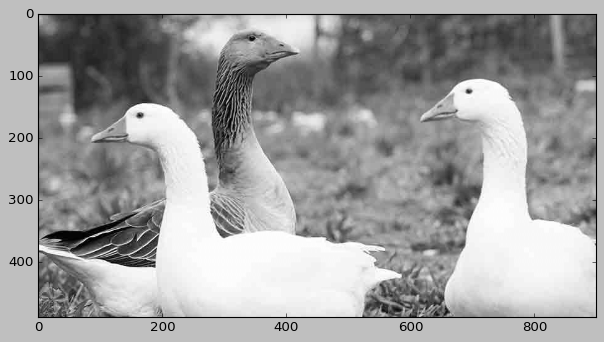

In [115]:
import matplotlib.pyplot as plt
from PIL import Image

plt.style.use('classic')
img = Image.open('goose.jpg')
# convert image to grayscale
imggray = img.convert('LA')
# convert to numpy array
imgmat = np.array(list(imggray.getdata(band=0)), float)
# Reshape according to orginal image dimensions
imgmat.shape = (imggray.size[1], imggray.size[0])

plt.figure(figsize=(9, 6))
plt.imshow(imgmat, cmap='gray')
plt.show()

### Find SVD for the image data matrix (imgmat) and check the shape of the matrices (imgmat, U, D, and V.T)

In [131]:
print('Image matrix shape:', imgmat.shape)

Image matrix shape: (488, 900)


In [141]:
U, D, V_transpose = np.linalg.svd(imgmat)
V = V_transpose.T

print('V Shape:', V.shape)

V Shape: (900, 900)


In [134]:
print('Singular Values Shape:', D.shape)

Singular Values Shape: (488,)


In [128]:
print('U Shape:', U.shape)

U Shape: (488, 488)


### Remember:
#### D contains the singular values that need to be put into a diagonal matrix. 
#### Principal components can be obtained from U columns and V.T rows.

#### The singular vectors and singular values are ordered with the first ones corresponding to the more variance explained. For this reason, using just the first few singular vectors and singular values will provide the reconstruction of the principal elements of the image.

### Reconstruct the image from the first 2 principal components

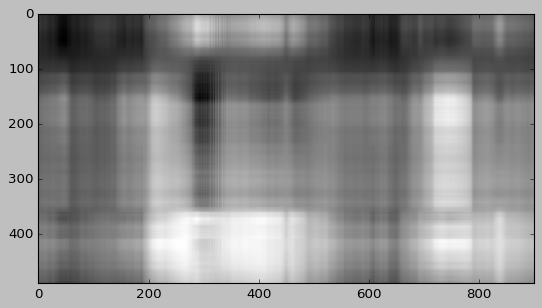

In [146]:
n = 2
constructed_imgmat = U[:, :n] @ np.diag(D[:n]) @ V_transpose[:n]

plt.imshow(constructed_imgmat, cmap='gray')

### Reconstruct the image from the first 10 principal components

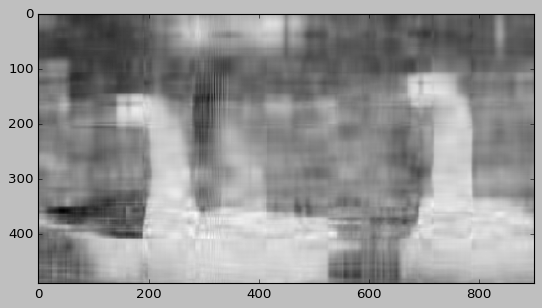

In [147]:
n = 10
constructed_imgmat = U[:, :n] @ np.diag(D[:n]) @ V_transpose[:n]

plt.imshow(constructed_imgmat, cmap='gray')

### Reconstruct the image from the first 50 principal components

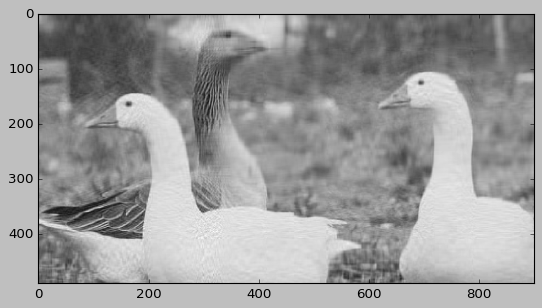

In [148]:
n = 50
constructed_imgmat = U[:, :n] @ np.diag(D[:n]) @ V_transpose[:n]

plt.imshow(constructed_imgmat, cmap='gray')

### Reconstruct the image from the first 100 principal components

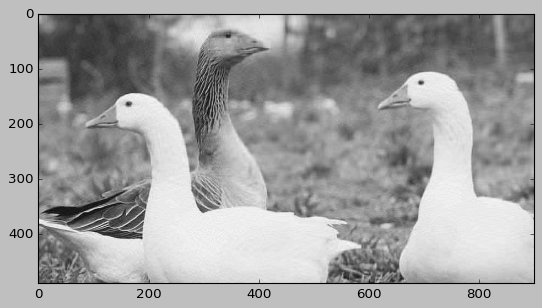

In [149]:
n = 100
constructed_imgmat = U[:, :n] @ np.diag(D[:n]) @ V_transpose[:n]

plt.imshow(constructed_imgmat, cmap='gray')

### Reconstruct the image from the first 200 principal components

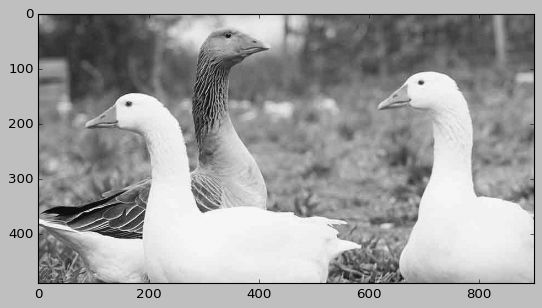

In [153]:
n = 200
constructed_imgmat = U[:, :n] @ np.diag(D[:n]) @ V_transpose[:n]

plt.imshow(constructed_imgmat, cmap='gray')

### What are the maximum number of components that you can use to reconstruct the image without loosing any information.
### Reconstruct the image using these components and compare the quality with the original image.
### Explain why did you choose this number.
### Can we use 500 principal components to reconstruct the image? Why?

Answer:

the maximum number of co,ponents to reconsruct the image is 488 components 

we can't use 500 components as that's larger than the rank of the image which gets you out of range in the calculations

Maximum number of components:  488


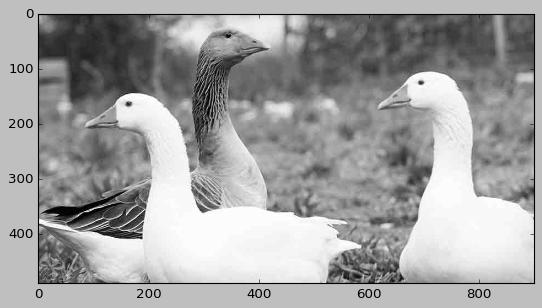

In [156]:
# Image with full number of principal components
n=np.linalg.matrix_rank(imgmat)
print('Maximum number of components: ', n)

constructed_imgmat = U[:, :n] @ np.diag(D[:n]) @ V_transpose[:n]

plt.imshow(constructed_imgmat, cmap='gray')

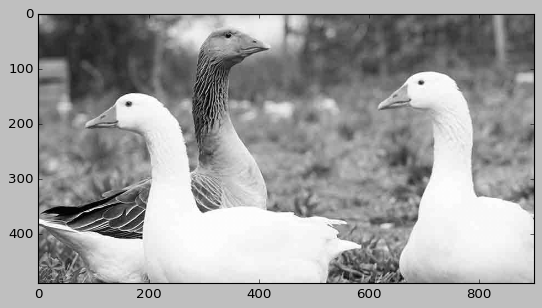

In [155]:
# Original image
plt.imshow(imgmat,cmap='gray')

## PCA Practical Exercise
- In this example we will use a real data and apply PCA as a dimensionality reduction method.
- <b>Note that,</b> in the following exercise we will use the numpy linear algebra package and numpy arrays to perform our task. However, in the future you will use <b>sklearn ML library and pandas data frame</b> which are more practically used in the work environment.

### Use the following code to load your data and print out its description

In [157]:
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

print(cancer.keys())

print(cancer['DESCR'])

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])
.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these 

### Use the following code to save the input features into numpy array

In [158]:
Data = cancer['data']

### Check out the shape of the data matrix

In [161]:
Data.shape

(569, 30)

### Display a scatter plot between the first feature (first column. i.e. index 0) and the second feature (second column. i.e. index 1)  

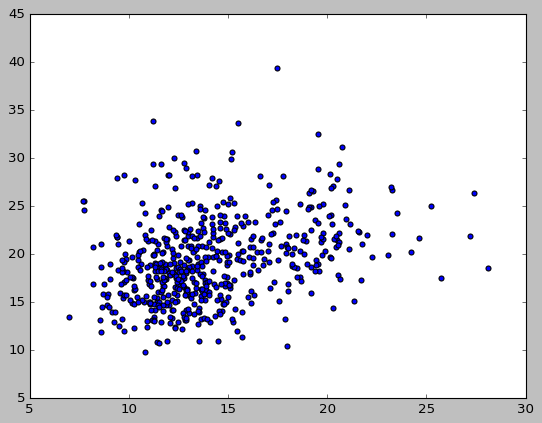

In [171]:
plt.scatter(Data[:, 0], Data[:, 1])

### Display a scatter plot between the first feature (first column. i.e. index 0) and the 23rd feature (23rd column. i.e. index 22)  

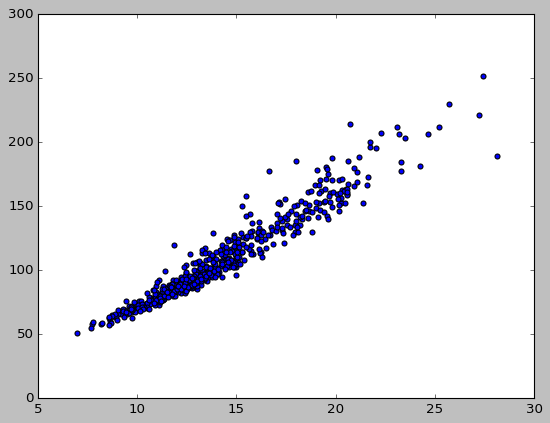

In [172]:
plt.scatter(Data[:, 0], Data[:, 22])

### Display a scatter plot between any other two features (columns of your chice)

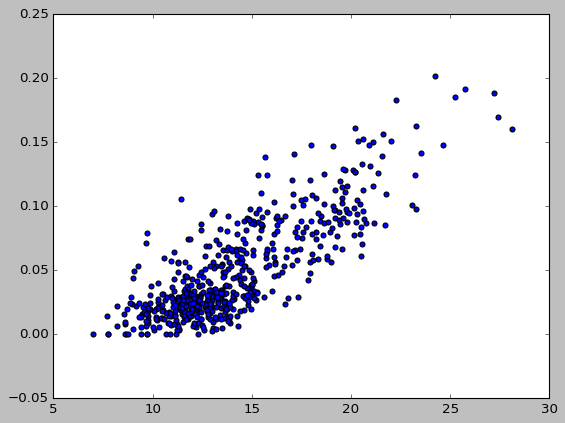

In [173]:
plt.scatter(Data[:, 0], Data[:, 7])

### Standrdize the data (Subtract mean and divide by standard deviation)

In [177]:
Data_standard = (Data - Data.mean(0)) / Data.std(0)

print('mean:\n', Data.mean(0))
print()
print('std:\n', Data.std(0))
print()
print('Standardized Data:\n', Data_standard)

mean:
 [1.41272917e+01 1.92896485e+01 9.19690334e+01 6.54889104e+02
 9.63602812e-02 1.04340984e-01 8.87993158e-02 4.89191459e-02
 1.81161863e-01 6.27976098e-02 4.05172056e-01 1.21685343e+00
 2.86605923e+00 4.03370791e+01 7.04097891e-03 2.54781388e-02
 3.18937163e-02 1.17961371e-02 2.05422988e-02 3.79490387e-03
 1.62691898e+01 2.56772232e+01 1.07261213e+02 8.80583128e+02
 1.32368594e-01 2.54265044e-01 2.72188483e-01 1.14606223e-01
 2.90075571e-01 8.39458172e-02]

std:
 [3.52095076e+00 4.29725464e+00 2.42776193e+01 3.51604754e+02
 1.40517641e-02 5.27663291e-02 7.96497253e-02 3.87687325e-02
 2.73901809e-02 7.05415588e-03 2.77068942e-01 5.51163427e-01
 2.02007710e+00 4.54510134e+01 2.99987837e-03 1.78924359e-02
 3.01595231e-02 6.16486075e-03 8.25910439e-03 2.64374475e-03
 4.82899258e+00 6.14085432e+00 3.35730016e+01 5.68856459e+02
 2.28123569e-02 1.57198171e-01 2.08440875e-01 6.56745545e-02
 6.18130785e-02 1.80453893e-02]

Standardized Data:
 [[ 1.09706398 -2.07333501  1.26993369 ...  2.29

### Find the covariance matrix of the standardized data and print its shape

In [184]:
Data_cov = (Data_standard.T @ Data_standard) / len(Data_standard)
# OR
# Data_cov = np.cov(Data_standard, rowvar=False, bias=True)

print('Covariance Matrix Shape:', Data_cov.shape)

Covariance Matrix Shape: (30, 30)


### Find eigen values and eigen vectors of the covariance matrix and print eigen values.

In [185]:
eig_values, eig_vectors = np.linalg.eig(Data_cov)

print('Eign Values:\n', eig_values)

Eign Values:
 [1.32816077e+01 5.69135461e+00 2.81794898e+00 1.98064047e+00
 1.64873055e+00 1.20735661e+00 6.75220114e-01 4.76617140e-01
 4.16894812e-01 3.50693457e-01 2.93915696e-01 2.61161370e-01
 2.41357496e-01 1.57009724e-01 9.41349650e-02 7.98628010e-02
 5.93990378e-02 5.26187835e-02 4.94775918e-02 1.33044823e-04
 7.48803097e-04 1.58933787e-03 6.90046388e-03 8.17763986e-03
 1.54812714e-02 1.80550070e-02 2.43408378e-02 2.74394025e-02
 3.11594025e-02 2.99728939e-02]


### Tricky questions:
#### How much explained variance if we used 2,3,4,5,6 principal components?
#### Can you guess the major principal components?

In [208]:
n = 2
explained_varinace = np.sum(eig_values[:n]) / np.sum(eig_values)

print(f'Explained varinace % ({n} PCs:) \n {explained_varinace*100} %')

Explained varinace % (2 PCs:) 
 63.243207651559445 %


In [209]:
n = 3
explained_varinace = np.sum(eig_values[:n]) / np.sum(eig_values)

print(f'Explained varinace % ({n} PCs:) \n {explained_varinace*100} %')

Explained varinace % (3 PCs:) 
 72.63637090899081 %


In [210]:
n = 4
explained_varinace = np.sum(eig_values[:n]) / np.sum(eig_values)

print(f'Explained varinace % ({n} PCs:) \n {explained_varinace*100} %')

Explained varinace % (4 PCs:) 
 79.23850582446097 %


In [211]:
n = 5
explained_varinace = np.sum(eig_values[:n]) / np.sum(eig_values)

print(f'Explained varinace % ({n} PCs:) \n {explained_varinace*100} %')

Explained varinace % (5 PCs:) 
 84.73427431680723 %


In [212]:
n = 6
explained_varinace = np.sum(eig_values[:n]) / np.sum(eig_values)

print(f'Explained varinace % ({n} PCs:) \n {explained_varinace*100} %')

Explained varinace % (6 PCs:) 
 88.75879635669058 %


### Use the first two PCs and transform you data (using projection)

In [228]:
Data_transformed = Data_standard @ eig_vectors[:, :2]

print('Transformed Data:\n', Data_transformed)

Transformed Data:
 [[ 9.19283683  1.94858307]
 [ 2.3878018  -3.76817174]
 [ 5.73389628 -1.0751738 ]
 ...
 [ 1.25617928 -1.90229671]
 [10.37479406  1.67201011]
 [-5.4752433  -0.67063679]]


### Show a scatter plot of the transformed data (Notice the graph)

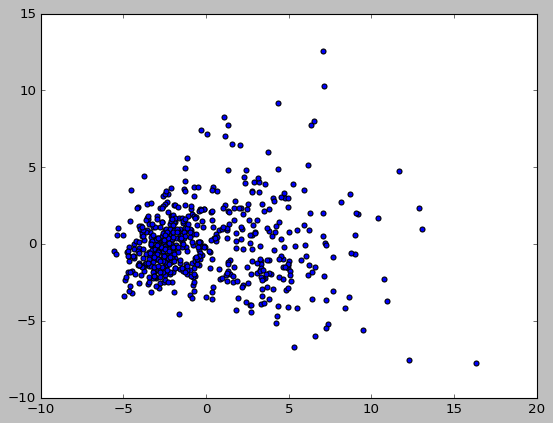

In [229]:
plt.scatter(Data_transformed[:,0], Data_transformed[:,1])

### Find the correlation and covariance matrices for the transformed data. (Notice the results)

In [246]:
np.corrcoef(Data_transformed, rowvar=False)

array([[1.00000000e+00, 2.44170792e-16],
       [2.44170792e-16, 1.00000000e+00]])

In [247]:
np.cov(Data_transformed, rowvar=False, bias=True)

array([[1.32816077e+01, 2.12288691e-15],
       [2.12288691e-15, 5.69135461e+00]])

## Congratulations 
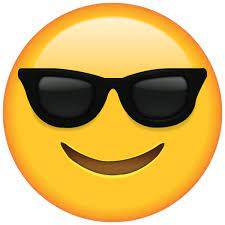